In [17]:
import pandas as pd

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

In [19]:
invoicePurchase=pd.read_csv(r"C:\Users\44789\Downloads\InvoicePurchases12312016.csv",dtype = {'VendorNumber': str,'PONumber':str,},parse_dates=['InvoiceDate','PODate','PayDate'],dayfirst=True)
BegInventory=pd.read_csv(r"C:\Users\44789\Downloads\BegInvFINAL12312016.csv",dtype={"Store":str,"Brand":str},parse_dates=['startDate'])
EndInventory=pd.read_csv(r"C:\Users\44789\Downloads\EndInvFINAL12312016.csv",dtype={'Store':str,'Brand':str},parse_dates=['endDate'])
SalesFinal=pd.read_csv(r"C:\Users\44789\Downloads\SalesFINAL12312016.csv",dtype={'Store':str,'Brand':str,'VendorNo':str,'Classification':str},parse_dates=['SalesDate'])
PurchaseFinal=pd.read_csv(r"C:\Users\44789\Downloads\PurchasesFINAL12312016.csv",dtype={'Store':str,'Brand':str,'VendorNumber':str,'PONumber':str,'Classification':str},parse_dates=['PODate','ReceivingDate','InvoiceDate','PayDate'])
                            

In [20]:
invoicePurchase=invoicePurchase.drop_duplicates()
BegInventory=BegInventory.drop_duplicates()
EndInventory=EndInventory.drop_duplicates()
SalesFinal=SalesFinal.drop_duplicates()
PurchaseFinal=PurchaseFinal.drop_duplicates()


In [21]:
invoicePurchase.isnull().sum()

VendorNumber       0
VendorName         0
InvoiceDate        0
PONumber           0
PODate             0
PayDate            0
Quantity           0
Dollars            0
Freight            0
Approval        5169
dtype: int64

In [22]:
invoicePurchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5543 entries, 0 to 5542
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   VendorNumber  5543 non-null   object        
 1   VendorName    5543 non-null   object        
 2   InvoiceDate   5543 non-null   datetime64[ns]
 3   PONumber      5543 non-null   object        
 4   PODate        5543 non-null   datetime64[ns]
 5   PayDate       5543 non-null   datetime64[ns]
 6   Quantity      5543 non-null   int64         
 7   Dollars       5543 non-null   float64       
 8   Freight       5543 non-null   float64       
 9   Approval      374 non-null    object        
dtypes: datetime64[ns](3), float64(2), int64(1), object(4)
memory usage: 433.2+ KB


In [23]:
invoicePurchase['VendorName'].unique()

array(['ALTAMAR BRANDS LLC         ', 'AMERICAN VINTAGE BEVERAGE  ',
       'ATLANTIC IMPORTING COMPANY ', 'BACARDI USA INC            ',
       'BANFI PRODUCTS CORP        ', 'BLACK PRINCE DISTILLERY INC',
       'BROWN-FORMAN CORP          ', 'BULLY BOY DISTILLERS       ',
       'CALEDONIA SPIRITS INC      ', 'CAMPARI AMERICA            ',
       'CANDIA VINEYARDS           ', 'CASTLE BRANDS CORP.        ',
       'CENTEUR IMPORTS LLC        ', 'CHARLES JACQUIN ET CIE INC ',
       'CONSTELLATION BRANDS INC   ', 'CRUSH WINES                ',
       'DELICATO VINEYARDS INC     ', 'DIAGEO CHATEAU ESTATE WINES',
       'DIAGEO NORTH AMERICA INC   ', 'DISARONNO INTERNATIONAL LLC',
       'DJINN SPIRITS LLC          ', 'DUGGANS DISTILLED PRODUCTS ',
       'E & J GALLO WINERY         ', 'EDRINGTON AMERICAS         ',
       'FABRIZIA SPIRITS LLC       ', 'FLAG HILL WINERY & VINEYARD',
       'FORTUNE WINE BROKERS LLC   ', 'FREDERICK WILDMAN & SONS   ',
       'HEAVEN HILL DISTILLERIES  

In [24]:
invoicePurchase['InvoiceDate']=pd.to_datetime(invoicePurchase['InvoiceDate']).dt.strftime('%d/%m/%Y')

In [25]:
invoicePurchase

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,04/01/2016,8124,2015-12-21,2016-02-16,6,214.26,3.47,NaN
1,4466,AMERICAN VINTAGE BEVERAGE,07/01/2016,8137,2015-12-22,2016-02-21,15,140.55,8.57,NaN
2,388,ATLANTIC IMPORTING COMPANY,09/01/2016,8169,2015-12-24,2016-02-16,5,106.60,4.61,NaN
3,480,BACARDI USA INC,12/01/2016,8106,2015-12-20,2016-02-05,10100,137483.78,2935.20,NaN
4,516,BANFI PRODUCTS CORP,07/01/2016,8170,2015-12-24,2016-02-12,1935,15527.25,429.20,NaN
...,...,...,...,...,...,...,...,...,...,...
5538,9622,WEIN BAUER INC,06/01/2017,13626,2016-12-21,2017-02-10,90,1563.00,8.60,NaN
5539,9625,WESTERN SPIRITS BEVERAGE CO,10/01/2017,13661,2016-12-23,2017-02-18,4617,37300.48,186.50,NaN
5540,3664,WILLIAM GRANT & SONS INC,02/01/2017,13643,2016-12-22,2017-02-04,9848,202815.78,932.95,NaN
5541,9815,WINE GROUP INC,03/01/2017,13602,2016-12-20,2017-02-08,24747,149007.56,819.54,NaN


In [26]:
invoicePurchase['TotalCost']=invoicePurchase['Dollars']+invoicePurchase['Freight']

In [27]:
invoicePurchase

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval,TotalCost
0,105,ALTAMAR BRANDS LLC,04/01/2016,8124,2015-12-21,2016-02-16,6,214.26,3.47,NaN,217.73
1,4466,AMERICAN VINTAGE BEVERAGE,07/01/2016,8137,2015-12-22,2016-02-21,15,140.55,8.57,NaN,149.12
2,388,ATLANTIC IMPORTING COMPANY,09/01/2016,8169,2015-12-24,2016-02-16,5,106.60,4.61,NaN,111.21
3,480,BACARDI USA INC,12/01/2016,8106,2015-12-20,2016-02-05,10100,137483.78,2935.20,NaN,140418.98
4,516,BANFI PRODUCTS CORP,07/01/2016,8170,2015-12-24,2016-02-12,1935,15527.25,429.20,NaN,15956.45
...,...,...,...,...,...,...,...,...,...,...,...
5538,9622,WEIN BAUER INC,06/01/2017,13626,2016-12-21,2017-02-10,90,1563.00,8.60,NaN,1571.60
5539,9625,WESTERN SPIRITS BEVERAGE CO,10/01/2017,13661,2016-12-23,2017-02-18,4617,37300.48,186.50,NaN,37486.98
5540,3664,WILLIAM GRANT & SONS INC,02/01/2017,13643,2016-12-22,2017-02-04,9848,202815.78,932.95,NaN,203748.73
5541,9815,WINE GROUP INC,03/01/2017,13602,2016-12-20,2017-02-08,24747,149007.56,819.54,NaN,149827.10


In [28]:
invoicePurchase.drop(columns='Approval')

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,TotalCost
0,105,ALTAMAR BRANDS LLC,04/01/2016,8124,2015-12-21,2016-02-16,6,214.26,3.47,217.73
1,4466,AMERICAN VINTAGE BEVERAGE,07/01/2016,8137,2015-12-22,2016-02-21,15,140.55,8.57,149.12
2,388,ATLANTIC IMPORTING COMPANY,09/01/2016,8169,2015-12-24,2016-02-16,5,106.60,4.61,111.21
3,480,BACARDI USA INC,12/01/2016,8106,2015-12-20,2016-02-05,10100,137483.78,2935.20,140418.98
4,516,BANFI PRODUCTS CORP,07/01/2016,8170,2015-12-24,2016-02-12,1935,15527.25,429.20,15956.45
...,...,...,...,...,...,...,...,...,...,...
5538,9622,WEIN BAUER INC,06/01/2017,13626,2016-12-21,2017-02-10,90,1563.00,8.60,1571.60
5539,9625,WESTERN SPIRITS BEVERAGE CO,10/01/2017,13661,2016-12-23,2017-02-18,4617,37300.48,186.50,37486.98
5540,3664,WILLIAM GRANT & SONS INC,02/01/2017,13643,2016-12-22,2017-02-04,9848,202815.78,932.95,203748.73
5541,9815,WINE GROUP INC,03/01/2017,13602,2016-12-20,2017-02-08,24747,149007.56,819.54,149827.10


In [29]:
invoicePurchase2=invoicePurchase.groupby('VendorName')[['Quantity','TotalCost']].sum()

In [30]:
invoicePurchase2

,Quantity,TotalCost
VendorName,,
AAPER ALCOHOL & CHEMICAL CO,1,105.55
ADAMBA IMPORTS INTL INC,4732,77137.77
ALISA CARR BEVERAGES,438,35123.68
ALTAMAR BRANDS LLC,332,11768.59
AMERICAN SPIRITS EXCHANGE,132,1211.35
AMERICAN VINTAGE BEVERAGE,15778,157151.19
APPOLO VINEYARDS LLC,230,2411.98
ATLANTIC IMPORTING COMPANY,1847,41328.06
BACARDI USA INC,1427075,17713664.99


In [31]:
pd.set_option('display.max.rows',2000)

In [32]:
invoicePurchase2=invoicePurchase2.sort_values(by='TotalCost',ascending=False)

In [33]:
invoicePurchase2

,Quantity,TotalCost
VendorName,,
DIAGEO NORTH AMERICA INC,5459788,51216828.92
MARTIGNETTI COMPANIES,2637275,27966193.83
JIM BEAM BRANDS COMPANY,2737165,24327032.02
PERNOD RICARD USA,1647558,24247871.78
BACARDI USA INC,1427075,17713664.99
CONSTELLATION BRANDS INC,2325892,15653446.89
BROWN-FORMAN CORP,1006122,13598034.76
ULTRA BEVERAGE COMPANY LLP,1077527,13278668.63
E & J GALLO WINERY,1858260,12351575.00


In [34]:
invoicePurchase3=invoicePurchase[['VendorName','Quantity','Dollars','Freight','TotalCost']]

In [35]:
invoicePurchase3

,VendorName,Quantity,Dollars,Freight,TotalCost
0,ALTAMAR BRANDS LLC,6,214.26,3.47,217.73
1,AMERICAN VINTAGE BEVERAGE,15,140.55,8.57,149.12
2,ATLANTIC IMPORTING COMPANY,5,106.60,4.61,111.21
3,BACARDI USA INC,10100,137483.78,2935.20,140418.98
4,BANFI PRODUCTS CORP,1935,15527.25,429.20,15956.45
...,...,...,...,...,...
5538,WEIN BAUER INC,90,1563.00,8.60,1571.60
5539,WESTERN SPIRITS BEVERAGE CO,4617,37300.48,186.50,37486.98
5540,WILLIAM GRANT & SONS INC,9848,202815.78,932.95,203748.73
5541,WINE GROUP INC,24747,149007.56,819.54,149827.10


In [36]:
invoicePurchase['CreditorsDay']=invoicePurchase['PayDate']-invoicePurchase['PODate']

In [37]:
invoicePurchase

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval,TotalCost,CreditorsDay
0,105,ALTAMAR BRANDS LLC,04/01/2016,8124,2015-12-21,2016-02-16,6,214.26,3.47,NaN,217.73,57 days
1,4466,AMERICAN VINTAGE BEVERAGE,07/01/2016,8137,2015-12-22,2016-02-21,15,140.55,8.57,NaN,149.12,61 days
2,388,ATLANTIC IMPORTING COMPANY,09/01/2016,8169,2015-12-24,2016-02-16,5,106.60,4.61,NaN,111.21,54 days
3,480,BACARDI USA INC,12/01/2016,8106,2015-12-20,2016-02-05,10100,137483.78,2935.20,NaN,140418.98,47 days
4,516,BANFI PRODUCTS CORP,07/01/2016,8170,2015-12-24,2016-02-12,1935,15527.25,429.20,NaN,15956.45,50 days
...,...,...,...,...,...,...,...,...,...,...,...,...
5538,9622,WEIN BAUER INC,06/01/2017,13626,2016-12-21,2017-02-10,90,1563.00,8.60,NaN,1571.60,51 days
5539,9625,WESTERN SPIRITS BEVERAGE CO,10/01/2017,13661,2016-12-23,2017-02-18,4617,37300.48,186.50,NaN,37486.98,57 days
5540,3664,WILLIAM GRANT & SONS INC,02/01/2017,13643,2016-12-22,2017-02-04,9848,202815.78,932.95,NaN,203748.73,44 days
5541,9815,WINE GROUP INC,03/01/2017,13602,2016-12-20,2017-02-08,24747,149007.56,819.54,NaN,149827.10,50 days


In [38]:
invoicePurchase5=invoicePurchase.groupby('VendorName')[['CreditorsDay','TotalCost']].mean()

In [39]:
invoicePurchase5.sort_values(by='CreditorsDay',ascending=False)

,CreditorsDay,TotalCost
VendorName,,
LAUREATE IMPORTS CO,62 days 00:00:00,141.660000
FLAVOR ESSENCE INC,60 days 00:00:00,17.090000
AAPER ALCOHOL & CHEMICAL CO,57 days 00:00:00,105.550000
UNCORKED,56 days 00:00:00,425.938571
GILMANTON WINERY & VINEYARD,55 days 12:00:00,677.458750
AMERICAN SPIRITS EXCHANGE,54 days 20:00:00,201.891667
VINEDREA WINES LLC,54 days 13:12:00,234.106500
BLACK ROCK SPIRITS LLC,53 days 21:20:00,64.327222
HIGHLAND WINE MERCHANTS LLC,53 days 20:34:17.142857143,789.964286


In [40]:
lambda x:x[0:1]+'days'

<function __main__.<lambda>(x)>

In [41]:
invoicePurchase['CreditorsDay']=invoicePurchase['CreditorsDay'].astype(str)

In [42]:
invoicePurchase['CreditorsDay']=invoicePurchase['CreditorsDay'].apply(lambda x:x[0:2])

In [43]:
invoicePurchase['CreditorsDay']=invoicePurchase['CreditorsDay'].astype(float)

In [44]:
invoicePurchase

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval,TotalCost,CreditorsDay
0,105,ALTAMAR BRANDS LLC,04/01/2016,8124,2015-12-21,2016-02-16,6,214.26,3.47,NaN,217.73,57.0
1,4466,AMERICAN VINTAGE BEVERAGE,07/01/2016,8137,2015-12-22,2016-02-21,15,140.55,8.57,NaN,149.12,61.0
2,388,ATLANTIC IMPORTING COMPANY,09/01/2016,8169,2015-12-24,2016-02-16,5,106.60,4.61,NaN,111.21,54.0
3,480,BACARDI USA INC,12/01/2016,8106,2015-12-20,2016-02-05,10100,137483.78,2935.20,NaN,140418.98,47.0
4,516,BANFI PRODUCTS CORP,07/01/2016,8170,2015-12-24,2016-02-12,1935,15527.25,429.20,NaN,15956.45,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5538,9622,WEIN BAUER INC,06/01/2017,13626,2016-12-21,2017-02-10,90,1563.00,8.60,NaN,1571.60,51.0
5539,9625,WESTERN SPIRITS BEVERAGE CO,10/01/2017,13661,2016-12-23,2017-02-18,4617,37300.48,186.50,NaN,37486.98,57.0
5540,3664,WILLIAM GRANT & SONS INC,02/01/2017,13643,2016-12-22,2017-02-04,9848,202815.78,932.95,NaN,203748.73,44.0
5541,9815,WINE GROUP INC,03/01/2017,13602,2016-12-20,2017-02-08,24747,149007.56,819.54,NaN,149827.10,50.0


In [45]:
invoicePurchase5=invoicePurchase.groupby('VendorName')['CreditorsDay'].mean().sort_values(ascending=False).head(20)

In [46]:
invoicePurchase5

VendorName
LAUREATE IMPORTS CO                62.000000
FLAVOR ESSENCE INC                 60.000000
AAPER ALCOHOL & CHEMICAL CO        57.000000
UNCORKED                           56.000000
GILMANTON WINERY & VINEYARD        55.500000
AMERICAN SPIRITS EXCHANGE          54.833333
VINEDREA WINES LLC                 54.550000
BLACK ROCK SPIRITS LLC             53.888889
HIGHLAND WINE MERCHANTS LLC        53.857143
APPOLO VINEYARDS LLC               53.769231
ALISA CARR BEVERAGES               53.526316
Russian Standard Vodka             53.372549
MARTIGNETTI COMPANIES              53.345455
MILTONS DISTRIBUTING CO            53.300000
BROWN-FORMAN CORP                  53.145455
ULTRA BEVERAGE COMPANY LLP         53.072727
Circa Wines                        53.046512
PREMIER DISTRIBUTORS               53.037037
MARSALLE COMPANY                   52.945455
WILLIAM GRANT & SONS INC           52.872727
Name: CreditorsDay, dtype: float64

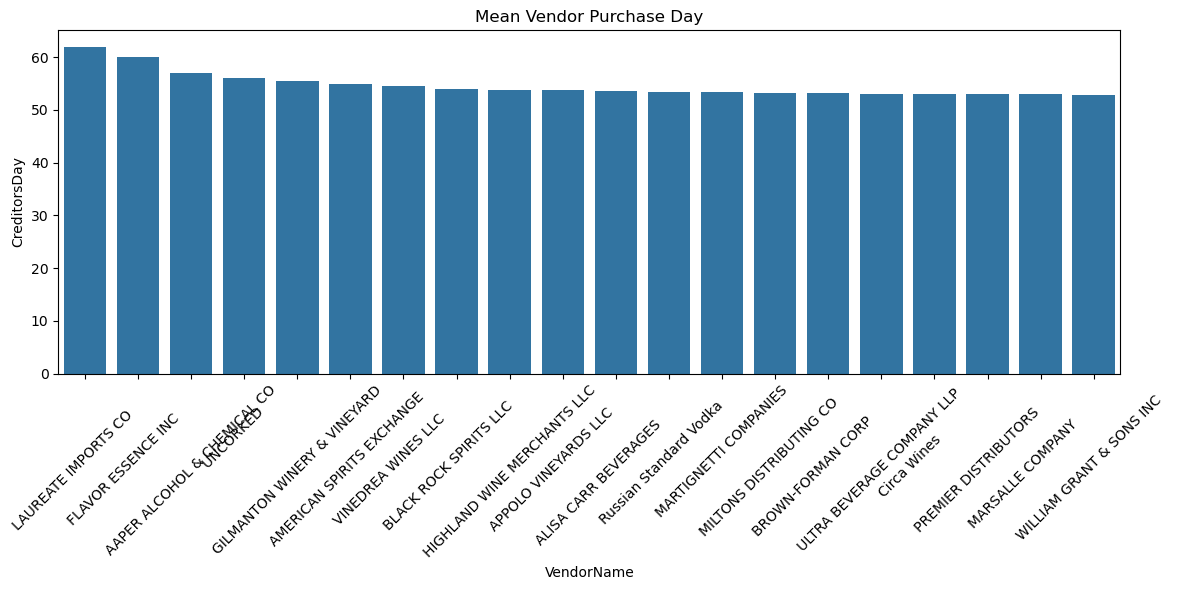

In [47]:
plt.figure(figsize=(12,6))
sns.barplot(x=invoicePurchase5.index,y=invoicePurchase5.values)
plt.title("Mean Vendor Purchase Day")
plt.xlabel("VendorName")
plt.ylabel("CreditorsDay")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [48]:
invoicePurchase6=invoicePurchase.groupby('VendorName')['TotalCost'].mean().sort_values(ascending=False).head(20)

In [49]:
invoicePurchase6

VendorName
DIAGEO NORTH AMERICA INC       931215.071273
MARTIGNETTI COMPANIES          508476.251455
JIM BEAM BRANDS COMPANY        442309.673091
PERNOD RICARD USA              440870.396000
BACARDI USA INC                322066.636182
CONSTELLATION BRANDS INC       284608.125273
BROWN-FORMAN CORP              247236.995636
ULTRA BEVERAGE COMPANY LLP     241430.338727
E & J GALLO WINERY             224574.090909
M S WALKER INC                 199843.074909
SAZERAC CO INC                 181219.343273
MOET HENNESSY USA INC          173115.317455
PROXIMO SPIRITS INC.           138673.176000
WILLIAM GRANT & SONS INC       108926.886727
PERFECTA WINES                 103531.310000
WINE GROUP INC                  96104.312727
CAMPARI AMERICA                 75685.191273
SOUTHERN WINE & SPIRITS NE      67611.314364
STOLI GROUP,(USA) LLC           67000.422000
SAZERAC NORTH AMERICA INC.      64652.906909
Name: TotalCost, dtype: float64

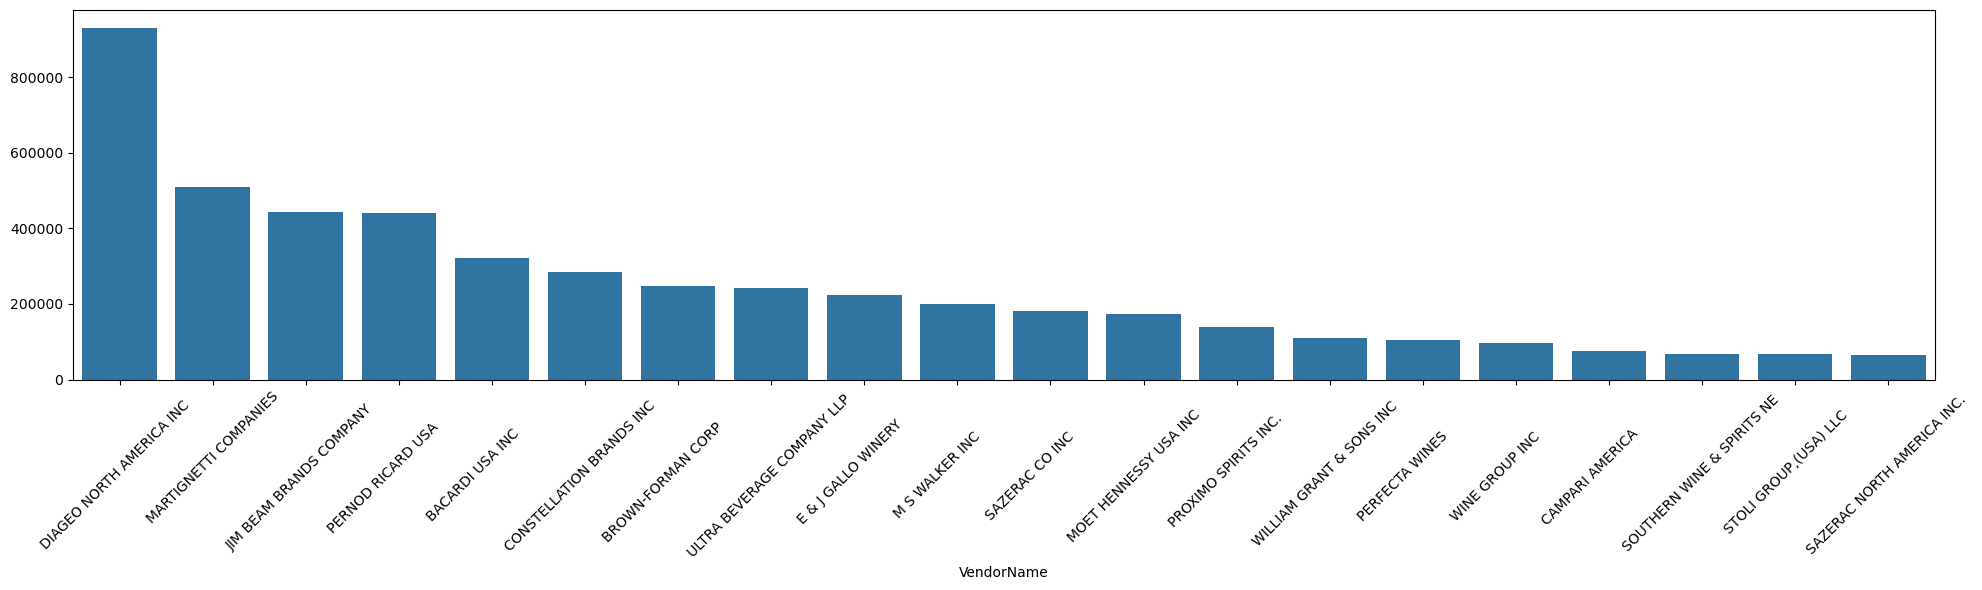

In [50]:
plt.figure(figsize=(20,6))
sns.barplot(x=invoicePurchase6.index,y=invoicePurchase6.values)
plt.title=('mean total cost')
plt.xlabel=('VendorName')
plt.ylabel=('TotalCost')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [51]:
BegInventory

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01
...,...,...,...,...,...,...,...,...,...
206524,79_BALLYMENA_46985,79,BALLYMENA,46985,Rodney Strong Cab Svgn Alexa,750mL,13,22.99,2016-01-01
206525,79_BALLYMENA_47014,79,BALLYMENA,47014,Juan Gil Jumilla Rd,750mL,13,13.99,2016-01-01
206526,79_BALLYMENA_47090,79,BALLYMENA,47090,Napa Cellars Cab Svgn Napa,750mL,19,23.99,2016-01-01
206527,79_BALLYMENA_90011,79,BALLYMENA,90011,Ch Pichon Longville 12 Pauil,750mL,12,144.99,2016-01-01


In [52]:
BegInventory.isnull().sum()

InventoryId    0
Store          0
City           0
Brand          0
Description    0
Size           0
onHand         0
Price          0
startDate      0
dtype: int64

In [53]:
BegInventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206529 entries, 0 to 206528
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InventoryId  206529 non-null  object        
 1   Store        206529 non-null  object        
 2   City         206529 non-null  object        
 3   Brand        206529 non-null  object        
 4   Description  206529 non-null  object        
 5   Size         206529 non-null  object        
 6   onHand       206529 non-null  int64         
 7   Price        206529 non-null  float64       
 8   startDate    206529 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 14.2+ MB


In [54]:
BegInventory['startDate'].nunique()

1

In [55]:
BegInventory['BegValue']=BegInventory['onHand']*BegInventory['Price']

In [56]:
BegInventory

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate,BegValue
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01,103.92
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01,76.93
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01,221.94
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01,116.97
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01,209.94
...,...,...,...,...,...,...,...,...,...,...
206524,79_BALLYMENA_46985,79,BALLYMENA,46985,Rodney Strong Cab Svgn Alexa,750mL,13,22.99,2016-01-01,298.87
206525,79_BALLYMENA_47014,79,BALLYMENA,47014,Juan Gil Jumilla Rd,750mL,13,13.99,2016-01-01,181.87
206526,79_BALLYMENA_47090,79,BALLYMENA,47090,Napa Cellars Cab Svgn Napa,750mL,19,23.99,2016-01-01,455.81
206527,79_BALLYMENA_90011,79,BALLYMENA,90011,Ch Pichon Longville 12 Pauil,750mL,12,144.99,2016-01-01,1739.88


In [57]:
BegInventory['Total'].loc=BegInventory.select_dtypes(pd.np.number).sum()

AttributeError: module 'pandas' has no attribute 'np'

In [58]:
BegInventory1=BegInventory.groupby('InventoryId')[['BegValue','onHand']].sum().sort_values(by='BegValue',ascending=False)

In [59]:
BegInventory1

,BegValue,onHand
InventoryId,,
69_MOUNTMEND_2753,35892.21,579
34_PITMERDEN_1233,31959.12,888
69_MOUNTMEND_3858,30011.49,1251
67_EANVERNESS_3545,23768.57,743
34_PITMERDEN_2753,23122.27,373
...,...,...
53_HILLFAR_652,0.00,0
53_HILLFAR_661,0.00,0
53_HILLFAR_7321,0.00,0


In [60]:
BegInventory2=BegInventory.groupby('Store')[['BegValue','onHand']].sum().sort_values(by='BegValue',ascending=False)

In [61]:
BegInventory2

,BegValue,onHand
Store,,
34,3291170.24,153852
73,3142497.36,162551
67,3079578.63,158996
66,2973033.90,149314
76,2952418.44,140208
69,2946726.65,144255
38,2232698.77,114368
55,2001263.66,119641
50,1649808.22,94720


In [62]:
TotalValue=sum(BegInventory['BegValue'])

In [63]:
TotalValue

68053780.17

In [64]:
TotalQuantity=sum(BegInventory['onHand'])

In [65]:
TotalQuantity

4219275

In [66]:
EndInventory

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2016-12-31
...,...,...,...,...,...,...,...,...,...
224484,81_PEMBROKE_90087,81,PEMBROKE,90087,Ch Mouton Rothschild 12 Paui,750mL,3,469.99,2016-12-31
224485,81_PEMBROKE_90088,81,PEMBROKE,90088,Ch Le Petite Mouton 12 Pauil,750mL,3,134.99,2016-12-31
224486,81_PEMBROKE_90089,81,PEMBROKE,90089,Ch Lynch Bages 12 Pauillac,750mL,3,119.99,2016-12-31
224487,81_PEMBROKE_90090,81,PEMBROKE,90090,Ch Lafite Rothschild 12,750mL,3,649.99,2016-12-31


In [67]:
EndInventory.isnull().sum()

InventoryId       0
Store             0
City           1284
Brand             0
Description       0
Size              0
onHand            0
Price             0
endDate           0
dtype: int64

In [68]:
EndInventory=EndInventory.replace('nan','')

In [69]:
EndInventory['City'].replace("nan","")

0         HARDERSFIELD
1         HARDERSFIELD
2         HARDERSFIELD
3         HARDERSFIELD
4         HARDERSFIELD
              ...     
224484        PEMBROKE
224485        PEMBROKE
224486        PEMBROKE
224487        PEMBROKE
224488        PEMBROKE
Name: City, Length: 224489, dtype: object

In [70]:
EndInventory

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2016-12-31
...,...,...,...,...,...,...,...,...,...
224484,81_PEMBROKE_90087,81,PEMBROKE,90087,Ch Mouton Rothschild 12 Paui,750mL,3,469.99,2016-12-31
224485,81_PEMBROKE_90088,81,PEMBROKE,90088,Ch Le Petite Mouton 12 Pauil,750mL,3,134.99,2016-12-31
224486,81_PEMBROKE_90089,81,PEMBROKE,90089,Ch Lynch Bages 12 Pauillac,750mL,3,119.99,2016-12-31
224487,81_PEMBROKE_90090,81,PEMBROKE,90090,Ch Lafite Rothschild 12,750mL,3,649.99,2016-12-31


In [71]:
EndInventory['ValueEnd']=EndInventory['onHand']*EndInventory['Price']

In [72]:
EndInventory1=EndInventory.groupby('InventoryId')[['ValueEnd','onHand']].sum().sort_values(by='ValueEnd',ascending=False)

In [73]:
EndInventory1

,ValueEnd,onHand
InventoryId,,
50_MOUNTMEND_1233,43597.54,1246
69_MOUNTMEND_2753,38993.50,650
50_MOUNTMEND_3545,35268.24,1176
50_MOUNTMEND_3405,33744.36,1164
50_MOUNTMEND_8068,29902.77,1273
...,...,...
41_LARNWICK_19700,0.00,0
41_LARNWICK_19735,0.00,0
4_EANVERNESS_8063,0.00,0


In [74]:
EndInventory2=EndInventory.groupby('Store')[['ValueEnd','onHand']].sum().sort_values(by='ValueEnd',ascending=False)

In [75]:
EndInventory2

,ValueEnd,onHand
Store,,
50,4887260.68,260717
73,3254662.81,164589
67,3076114.82,163765
34,3074616.75,145829
76,2975945.18,143866
69,2968678.82,150848
66,2860504.99,144579
74,2803645.13,166015
38,2463906.85,129397


In [76]:
TotalValueEnd=sum(EndInventory['ValueEnd'])

In [77]:
TotalValueEnd

79704851.13

In [78]:
TotalQuantityEnd=sum(EndInventory['onHand'])

In [79]:
TotalQuantityEnd

4885776

In [80]:
SalesFinal

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2016-01-01,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2016-01-02,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2016-01-03,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2016-01-08,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,2016-01-09,375,1,0.79,12546,JIM BEAM BRANDS COMPANY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,4,51.80,12.95,2016-02-12,750,2,0.45,2000,SOUTHERN WINE & SPIRITS NE
1048571,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,8,103.60,12.95,2016-02-13,750,2,0.90,2000,SOUTHERN WINE & SPIRITS NE
1048572,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,1,12.95,12.95,2016-02-19,750,2,0.11,2000,SOUTHERN WINE & SPIRITS NE
1048573,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,3,38.85,12.95,2016-02-22,750,2,0.34,2000,SOUTHERN WINE & SPIRITS NE


In [81]:
TotalSales=sum(SalesFinal['SalesDollars'])

In [82]:
TotalSales

33139375.29

In [83]:
SalesFinal_inv_id2=SalesFinal.groupby('Store')[['SalesQuantity','SalesDollars']].sum().sort_values(by='SalesDollars',ascending=False)

In [84]:
SalesFinal_inv_id2

,SalesQuantity,SalesDollars
Store,,
34,99171,1537806.51
15,101078,1422998.94
76,85724,1402698.59
73,77848,1266850.62
66,76814,1257824.93
38,84965,1237991.19
10,91576,1154926.80
69,73741,1131369.88
67,66678,1117046.85


In [85]:
SalesFinal_inv_id=SalesFinal.groupby('InventoryId')[['SalesQuantity','SalesDollars']].sum().sort_values(by='SalesDollars',ascending=False)

In [89]:
SalesFinal_inv_id

,SalesQuantity,SalesDollars
InventoryId,,
34_PITMERDEN_3545,843,25325.57
34_PITMERDEN_4261,1055,23199.45
15_WANBORNE_8068,810,20406.90
14_BROMWICH_4261,850,18691.50
10_HORNSEY_4261,836,18400.64
...,...,...
36_LEWES_3730,1,0.99
42_BLACK HOLLOW_1261,1,0.99
26_KNIFE'S EDGE_5603,1,0.99


In [87]:
SalesFinal_inv_id1=SalesFinal.groupby('InventoryId')['SalesDollars'].sum().sort_values(ascending=False).head(10)

TypeError: 'str' object is not callable

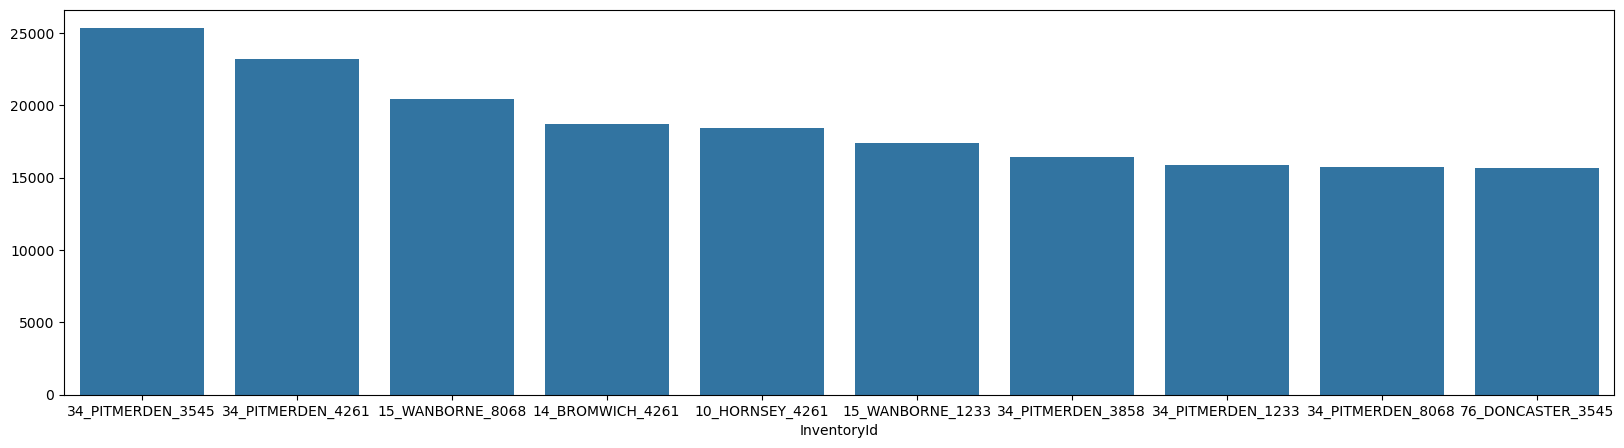

In [88]:
plt.figure(figsize=(20,5))
sns.barplot(x=SalesFinal_inv_id1.index,y=SalesFinal_inv_id1.values)
plt.title("Sales Revenue per Product")
plt.xlabel('Product Id')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
SalesFinal_Vendor=SalesFinal.groupby('VendorName')[['SalesQuantity','SalesDollars']].sum().sort_values(by='SalesDollars',ascending=False)

In [ ]:
SalesFinal_Vendor

In [ ]:
SalesFinal_Vendor1=SalesFinal.groupby('VendorName')['SalesDollars'].sum().sort_values(ascending=False).head(10)

In [ ]:
plt.figure(figsize=(20,6))
sns.barplot(x=SalesFinal_Vendor1.index,y=SalesFinal_Vendor1.values)
plt.title('Sales Revenue per vendor ')
plt.xlabel('VendorName')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
SalesFinal_Store=SalesFinal.groupby('Store')[['SalesQuantity','SalesDollars']].sum().sort_values(by='SalesDollars',ascending=False)

In [ ]:
SalesFinal_Store

In [ ]:
SalesFinal_Store1=SalesFinal.groupby('Store')['SalesDollars'].sum().sort_values(ascending=False).head(10)

In [ ]:
plt.figure(figsize=(20,6))
sns.barplot(x=SalesFinal_Store1.index,y=SalesFinal_Store1.values)
plt.title("Top 10 store sales")
plt.xlabel("Store")
plt.ylabel("SalesDollars")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [90]:
PurchaseFinal

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2372469,49_GARIGILL_22298,49,22298,Zorvino Vyds Sangiovese,750mL,90058,ZORVINO VINEYARDS,13593,2016-12-19,2016-12-28,2017-01-09,2017-02-06,8.06,12,96.72,2
2372470,1_HARDERSFIELD_19556,1,19556,Zorvino Bacca Z Blackberry,750mL,90058,ZORVINO VINEYARDS,13593,2016-12-19,2016-12-27,2017-01-09,2017-02-06,9.39,12,112.68,2
2372471,66_EANVERNESS_22297,66,22297,Zorvino Vyds Pearz,750mL,90058,ZORVINO VINEYARDS,13593,2016-12-19,2016-12-26,2017-01-09,2017-02-06,6.75,12,81.00,2
2372472,69_MOUNTMEND_19557,69,19557,Zorvino Fragole Z Strawberry,750mL,90058,ZORVINO VINEYARDS,13593,2016-12-19,2016-12-26,2017-01-09,2017-02-06,9.39,12,112.68,2


In [ ]:
PurchaseFinal_InvId=PurchaseFinal.groupby('InventoryId')[['Quantity','Dollars']].sum().sort_values(by='Dollars',ascending=False)

In [93]:
Total_purchases=sum(PurchaseFinal['Dollars'])

In [94]:
Total_purchases

321900765.53

In [96]:
Total_qty_purchases=sum(PurchaseFinal['Quantity'])

In [97]:
Total_qty_purchases

33584377

In [100]:
PurchaseFinal_InvId1=PurchaseFinal.groupby('InventoryId')['Dollars'].sum().sort_values(ascending=False).head(10)

In [101]:
PurchaseFinal_InvId2=PurchaseFinal.groupby('InventoryId')['Quantity'].sum().sort_values(ascending=False).head(10)

In [102]:
PurchaseFinal_InvId1

InventoryId
50_MOUNTMEND_1233     248593.01
76_DONCASTER_3405     234775.56
34_PITMERDEN_3405     188186.85
50_MOUNTMEND_8068     187908.48
34_PITMERDEN_3545     177396.56
66_EANVERNESS_3405    175988.91
76_DONCASTER_3545     167173.93
38_GOULCREST_3405     162144.48
34_PITMERDEN_4261     160406.40
73_DONCASTER_3405     156949.92
Name: Dollars, dtype: float64

TypeError: 'str' object is not callable

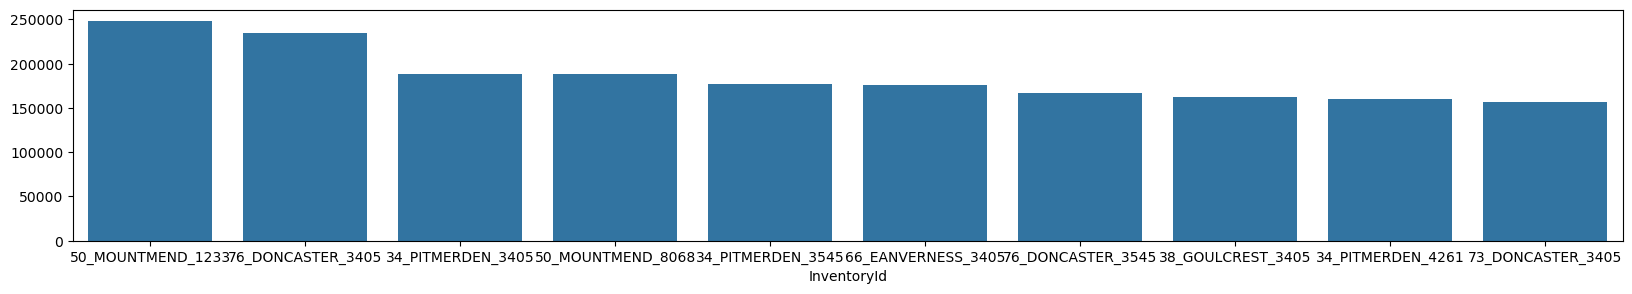

In [103]:
plt.figure(figsize=(20,3))
sns.barplot(x=PurchaseFinal_InvId1.index,y=PurchaseFinal_InvId1.values)
plt.title('Vendor by cost of Purchase')
plt.xlabel('VendorName')
plt.ylabel('Dollars')
plt.xticks(rotational=90)
plt.tight_layout()
plt.show()

In [105]:
PurchaseFinal_InvId2

InventoryId
76_DONCASTER_6570      12705
53_HILLFAR_8111        11648
27_MOUNTMEND_8111      10785
20_BREDWARDINE_8111    10784
50_MOUNTMEND_8068      10302
77_TAMWORTH_5111       10299
76_DONCASTER_3405      10124
34_PITMERDEN_6570       9969
34_PITMERDEN_4261       9920
38_GOULCREST_6570       9467
Name: Quantity, dtype: int64

TypeError: 'str' object is not callable

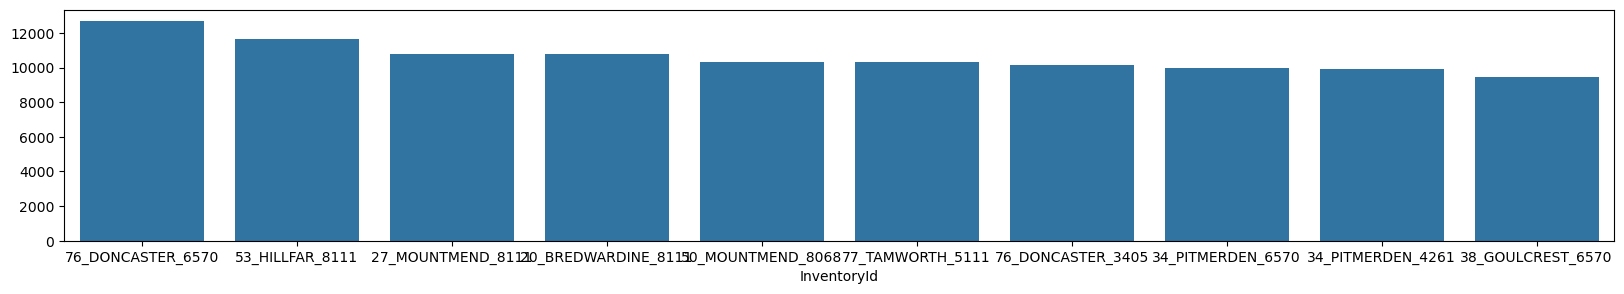

In [106]:
plt.figure(figsize=(20,3))
sns.barplot(x=PurchaseFinal_InvId2.index,y=PurchaseFinal_InvId2.values)
plt.title('Vendor by Quantity')
plt.xlabel('Product')
plt.ylabel('Quantity')
plt.xticks(rotational=90)
plt.tight_layout()
plt.show()

In [107]:
PurchaseFinal_VendorName=PurchaseFinal.groupby('VendorName')[['Quantity','Dollars']].sum().sort_values(by='Dollars',ascending=False)

In [108]:
PurchaseFinal_Vendor_Doll=PurchaseFinal.groupby('VendorName')['Dollars'].sum().sort_values(ascending=False).head(10)

In [109]:
PurchaseFinal_Vendor_Doll

VendorName
DIAGEO NORTH AMERICA INC       50959796.85
MARTIGNETTI COMPANIES          27821473.91
JIM BEAM BRANDS COMPANY        24203151.05
PERNOD RICARD USA              24124091.56
BACARDI USA INC                17624378.72
CONSTELLATION BRANDS INC       15573917.90
BROWN-FORMAN CORP              13529433.08
ULTRA BEVERAGE COMPANY LLP     13210613.93
E & J GALLO WINERY             12289608.09
M S WALKER INC                 10935817.30
Name: Dollars, dtype: float64

TypeError: 'str' object is not callable

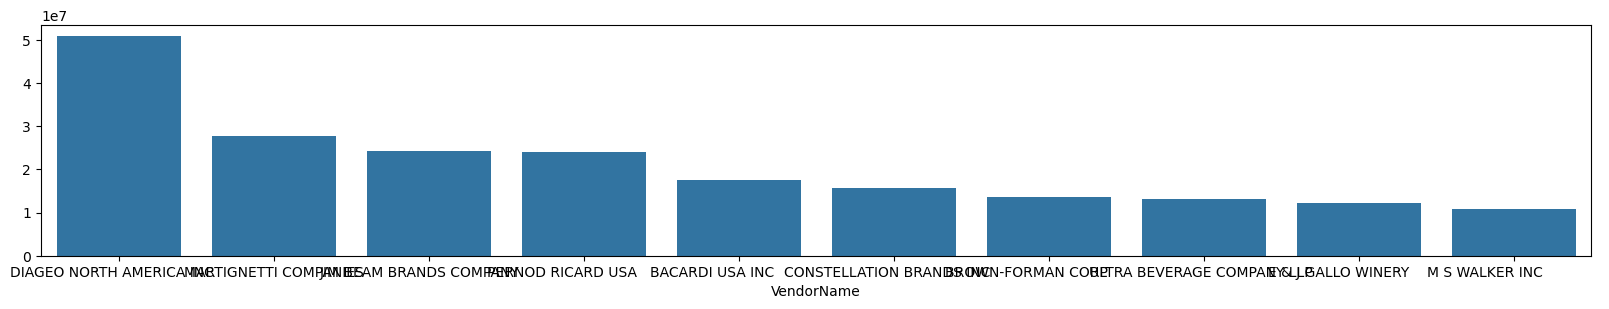

In [110]:
plt.figure(figsize=(20,3))
sns.barplot(x=PurchaseFinal_Vendor_Doll.index,y=PurchaseFinal_Vendor_Doll.values)
plt.title('Vendor by cost of Purchase')
plt.xlabel('VendorName')
plt.ylabel('Dollars')
plt.xticks(rotational=90)
plt.tight_layout()
plt.show()

In [111]:
PurchaseFinal_Vendor_QTY=PurchaseFinal.groupby('VendorName')['Quantity'].sum().sort_values(ascending=False).head(10)

In [112]:
PurchaseFinal_Vendor_QTY

VendorName
DIAGEO NORTH AMERICA INC       5459788
JIM BEAM BRANDS COMPANY        2737165
MARTIGNETTI COMPANIES          2637275
CONSTELLATION BRANDS INC       2325892
E & J GALLO WINERY             1858260
PERNOD RICARD USA              1647558
BACARDI USA INC                1427075
SAZERAC CO INC                 1417727
M S WALKER INC                 1372841
ULTRA BEVERAGE COMPANY LLP     1077527
Name: Quantity, dtype: int64

TypeError: 'str' object is not callable

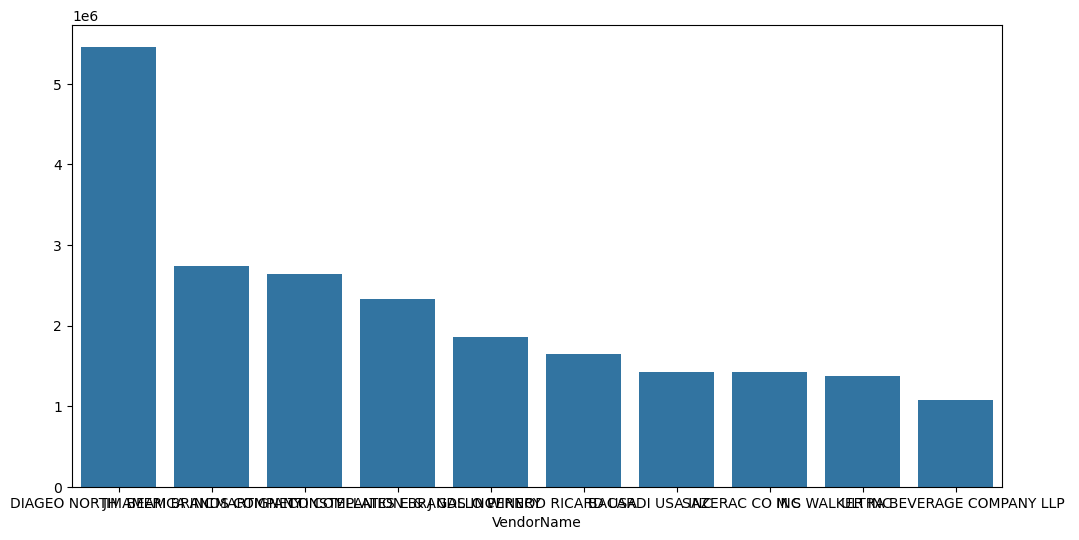

In [113]:
plt.figure(figsize=(12,6))
sns.barplot(x=PurchaseFinal_Vendor_QTY.index,y=PurchaseFinal_Vendor_QTY.values)
plt.title('purchase by qty')
plt.xlabel('VendorName')
plt.ylabel('Quantity')
plt.xticks(rotational=45)
plt.tight_layout()
plt.show()

In [114]:
BegInventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206529 entries, 0 to 206528
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InventoryId  206529 non-null  object        
 1   Store        206529 non-null  object        
 2   City         206529 non-null  object        
 3   Brand        206529 non-null  object        
 4   Description  206529 non-null  object        
 5   Size         206529 non-null  object        
 6   onHand       206529 non-null  int64         
 7   Price        206529 non-null  float64       
 8   startDate    206529 non-null  datetime64[ns]
 9   BegValue     206529 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 15.8+ MB


In [115]:
EndInventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224489 entries, 0 to 224488
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InventoryId  224489 non-null  object        
 1   Store        224489 non-null  object        
 2   City         223205 non-null  object        
 3   Brand        224489 non-null  object        
 4   Description  224489 non-null  object        
 5   Size         224489 non-null  object        
 6   onHand       224489 non-null  int64         
 7   Price        224489 non-null  float64       
 8   endDate      224489 non-null  datetime64[ns]
 9   ValueEnd     224489 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 17.1+ MB


In [116]:
Profit=BegInventory.merge(EndInventory,how='inner',on=['InventoryId','Store','City','Brand','Size','Description'])

In [117]:
Profit

,InventoryId,Store,City,Brand,Description,Size,onHand_x,Price_x,startDate,BegValue,onHand_y,Price_y,endDate,ValueEnd
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01,103.92,11,12.99,2016-12-31,142.89
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01,221.94,7,36.99,2016-12-31,258.93
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01,116.97,7,38.99,2016-12-31,272.93
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01,209.94,4,34.99,2016-12-31,139.96
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,18,14.99,2016-01-01,269.82,7,14.99,2016-12-31,104.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172320,79_BALLYMENA_46985,79,BALLYMENA,46985,Rodney Strong Cab Svgn Alexa,750mL,13,22.99,2016-01-01,298.87,44,23.99,2016-12-31,1055.56
172321,79_BALLYMENA_47014,79,BALLYMENA,47014,Juan Gil Jumilla Rd,750mL,13,13.99,2016-01-01,181.87,9,13.99,2016-12-31,125.91
172322,79_BALLYMENA_47090,79,BALLYMENA,47090,Napa Cellars Cab Svgn Napa,750mL,19,23.99,2016-01-01,455.81,14,23.99,2016-12-31,335.86
172323,79_BALLYMENA_90011,79,BALLYMENA,90011,Ch Pichon Longville 12 Pauil,750mL,12,144.99,2016-01-01,1739.88,9,144.99,2016-12-31,1304.91


In [119]:
Profit=Profit.drop(columns=['onHand_x','Price_x','onHand_y','Price_y'])

In [120]:
Profit

,InventoryId,Store,City,Brand,Description,Size,startDate,BegValue,endDate,ValueEnd
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,2016-01-01,103.92,2016-12-31,142.89
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,2016-01-01,221.94,2016-12-31,258.93
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,2016-01-01,116.97,2016-12-31,272.93
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,2016-01-01,209.94,2016-12-31,139.96
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,2016-01-01,269.82,2016-12-31,104.93
...,...,...,...,...,...,...,...,...,...,...
172320,79_BALLYMENA_46985,79,BALLYMENA,46985,Rodney Strong Cab Svgn Alexa,750mL,2016-01-01,298.87,2016-12-31,1055.56
172321,79_BALLYMENA_47014,79,BALLYMENA,47014,Juan Gil Jumilla Rd,750mL,2016-01-01,181.87,2016-12-31,125.91
172322,79_BALLYMENA_47090,79,BALLYMENA,47090,Napa Cellars Cab Svgn Napa,750mL,2016-01-01,455.81,2016-12-31,335.86
172323,79_BALLYMENA_90011,79,BALLYMENA,90011,Ch Pichon Longville 12 Pauil,750mL,2016-01-01,1739.88,2016-12-31,1304.91


In [121]:
Profit=Profit.merge(SalesFinal,how='inner',on=['InventoryId','Store','Brand','Size','Description'])

In [122]:
Profit

,InventoryId,Store,City,Brand,Description,Size,startDate,BegValue,endDate,ValueEnd,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,2016-01-01,103.92,2016-12-31,142.89,1,12.99,12.99,2016-01-07,750,1,0.79,8320,SHAW ROSS INT L IMP LTD
1,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,2016-01-01,103.92,2016-12-31,142.89,2,25.98,12.99,2016-02-10,750,1,1.57,8320,SHAW ROSS INT L IMP LTD
2,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,2016-01-01,103.92,2016-12-31,142.89,1,12.99,12.99,2016-02-11,750,1,0.79,8320,SHAW ROSS INT L IMP LTD
3,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,2016-01-01,103.92,2016-12-31,142.89,1,12.99,12.99,2016-02-13,750,1,0.79,8320,SHAW ROSS INT L IMP LTD
4,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,2016-01-01,103.92,2016-12-31,142.89,1,12.99,12.99,2016-02-14,750,1,0.79,8320,SHAW ROSS INT L IMP LTD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931810,79_BALLYMENA_47014,79,BALLYMENA,47014,Juan Gil Jumilla Rd,750mL,2016-01-01,181.87,2016-12-31,125.91,1,13.99,13.99,2016-01-30,750,2,0.11,9552,M S WALKER INC
931811,79_BALLYMENA_47090,79,BALLYMENA,47090,Napa Cellars Cab Svgn Napa,750mL,2016-01-01,455.81,2016-12-31,335.86,1,23.99,23.99,2016-01-19,750,2,0.11,8892,TRINCHERO FAMILY ESTATES
931812,79_BALLYMENA_47090,79,BALLYMENA,47090,Napa Cellars Cab Svgn Napa,750mL,2016-01-01,455.81,2016-12-31,335.86,1,23.99,23.99,2016-01-20,750,2,0.11,8892,TRINCHERO FAMILY ESTATES
931813,79_BALLYMENA_47090,79,BALLYMENA,47090,Napa Cellars Cab Svgn Napa,750mL,2016-01-01,455.81,2016-12-31,335.86,1,23.99,23.99,2016-01-29,750,2,0.11,8892,TRINCHERO FAMILY ESTATES


In [125]:
Profit=Profit.drop(columns=['Classification','ExciseTax','VendorNo'])

In [126]:
Profit

,InventoryId,Store,City,Brand,Description,Size,startDate,BegValue,endDate,ValueEnd,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,VendorName
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,2016-01-01,103.92,2016-12-31,142.89,1,12.99,12.99,2016-01-07,750,SHAW ROSS INT L IMP LTD
1,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,2016-01-01,103.92,2016-12-31,142.89,2,25.98,12.99,2016-02-10,750,SHAW ROSS INT L IMP LTD
2,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,2016-01-01,103.92,2016-12-31,142.89,1,12.99,12.99,2016-02-11,750,SHAW ROSS INT L IMP LTD
3,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,2016-01-01,103.92,2016-12-31,142.89,1,12.99,12.99,2016-02-13,750,SHAW ROSS INT L IMP LTD
4,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,2016-01-01,103.92,2016-12-31,142.89,1,12.99,12.99,2016-02-14,750,SHAW ROSS INT L IMP LTD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931810,79_BALLYMENA_47014,79,BALLYMENA,47014,Juan Gil Jumilla Rd,750mL,2016-01-01,181.87,2016-12-31,125.91,1,13.99,13.99,2016-01-30,750,M S WALKER INC
931811,79_BALLYMENA_47090,79,BALLYMENA,47090,Napa Cellars Cab Svgn Napa,750mL,2016-01-01,455.81,2016-12-31,335.86,1,23.99,23.99,2016-01-19,750,TRINCHERO FAMILY ESTATES
931812,79_BALLYMENA_47090,79,BALLYMENA,47090,Napa Cellars Cab Svgn Napa,750mL,2016-01-01,455.81,2016-12-31,335.86,1,23.99,23.99,2016-01-20,750,TRINCHERO FAMILY ESTATES
931813,79_BALLYMENA_47090,79,BALLYMENA,47090,Napa Cellars Cab Svgn Napa,750mL,2016-01-01,455.81,2016-12-31,335.86,1,23.99,23.99,2016-01-29,750,TRINCHERO FAMILY ESTATES


In [127]:
Profit=Profit.merge(PurchaseFinal,how='inner',on=['InventoryId','Store','Brand','Size','Description'])

In [128]:
Profit

,InventoryId,Store,City,Brand,Description,Size,startDate,BegValue,endDate,ValueEnd,...,VendorName_y,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,2016-01-01,103.92,2016-12-31,142.89,...,SHAW ROSS INT L IMP LTD,8166,2015-12-23,2016-01-01,2016-01-08,2016-02-11,9.28,6,55.68,1
1,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,2016-01-01,103.92,2016-12-31,142.89,...,SHAW ROSS INT L IMP LTD,8835,2016-02-08,2016-02-17,2016-02-27,2016-03-31,9.28,6,55.68,1
2,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,2016-01-01,103.92,2016-12-31,142.89,...,SHAW ROSS INT L IMP LTD,8920,2016-02-14,2016-02-26,2016-03-01,2016-04-15,9.28,6,55.68,1
3,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,2016-01-01,103.92,2016-12-31,142.89,...,SHAW ROSS INT L IMP LTD,9353,2016-03-15,2016-03-25,2016-04-04,2016-04-30,9.28,6,55.68,1
4,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,2016-01-01,103.92,2016-12-31,142.89,...,SHAW ROSS INT L IMP LTD,10090,2016-05-05,2016-05-12,2016-05-17,2016-07-03,9.28,5,46.40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23669392,79_BALLYMENA_47090,79,BALLYMENA,47090,Napa Cellars Cab Svgn Napa,750mL,2016-01-01,455.81,2016-12-31,335.86,...,TRINCHERO FAMILY ESTATES,9734,2016-04-10,2016-04-19,2016-04-29,2016-05-27,15.58,12,186.96,2
23669393,79_BALLYMENA_47090,79,BALLYMENA,47090,Napa Cellars Cab Svgn Napa,750mL,2016-01-01,455.81,2016-12-31,335.86,...,TRINCHERO FAMILY ESTATES,11119,2016-07-08,2016-07-13,2016-07-24,2016-09-04,15.58,12,186.96,2
23669394,79_BALLYMENA_47090,79,BALLYMENA,47090,Napa Cellars Cab Svgn Napa,750mL,2016-01-01,455.81,2016-12-31,335.86,...,TRINCHERO FAMILY ESTATES,12249,2016-09-23,2016-09-28,2016-10-10,2016-11-04,15.58,12,186.96,2
23669395,79_BALLYMENA_47090,79,BALLYMENA,47090,Napa Cellars Cab Svgn Napa,750mL,2016-01-01,455.81,2016-12-31,335.86,...,TRINCHERO FAMILY ESTATES,13591,2016-12-19,2016-12-28,2017-01-09,2017-02-18,15.58,12,186.96,2


In [130]:
Profit=Profit.drop(columns='Classification')

In [131]:
Profit

,InventoryId,Store,City,Brand,Description,Size,startDate,BegValue,endDate,ValueEnd,...,VendorNumber,VendorName_y,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,2016-01-01,103.92,2016-12-31,142.89,...,8320,SHAW ROSS INT L IMP LTD,8166,2015-12-23,2016-01-01,2016-01-08,2016-02-11,9.28,6,55.68
1,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,2016-01-01,103.92,2016-12-31,142.89,...,8320,SHAW ROSS INT L IMP LTD,8835,2016-02-08,2016-02-17,2016-02-27,2016-03-31,9.28,6,55.68
2,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,2016-01-01,103.92,2016-12-31,142.89,...,8320,SHAW ROSS INT L IMP LTD,8920,2016-02-14,2016-02-26,2016-03-01,2016-04-15,9.28,6,55.68
3,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,2016-01-01,103.92,2016-12-31,142.89,...,8320,SHAW ROSS INT L IMP LTD,9353,2016-03-15,2016-03-25,2016-04-04,2016-04-30,9.28,6,55.68
4,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,2016-01-01,103.92,2016-12-31,142.89,...,8320,SHAW ROSS INT L IMP LTD,10090,2016-05-05,2016-05-12,2016-05-17,2016-07-03,9.28,5,46.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23669392,79_BALLYMENA_47090,79,BALLYMENA,47090,Napa Cellars Cab Svgn Napa,750mL,2016-01-01,455.81,2016-12-31,335.86,...,8892,TRINCHERO FAMILY ESTATES,9734,2016-04-10,2016-04-19,2016-04-29,2016-05-27,15.58,12,186.96
23669393,79_BALLYMENA_47090,79,BALLYMENA,47090,Napa Cellars Cab Svgn Napa,750mL,2016-01-01,455.81,2016-12-31,335.86,...,8892,TRINCHERO FAMILY ESTATES,11119,2016-07-08,2016-07-13,2016-07-24,2016-09-04,15.58,12,186.96
23669394,79_BALLYMENA_47090,79,BALLYMENA,47090,Napa Cellars Cab Svgn Napa,750mL,2016-01-01,455.81,2016-12-31,335.86,...,8892,TRINCHERO FAMILY ESTATES,12249,2016-09-23,2016-09-28,2016-10-10,2016-11-04,15.58,12,186.96
23669395,79_BALLYMENA_47090,79,BALLYMENA,47090,Napa Cellars Cab Svgn Napa,750mL,2016-01-01,455.81,2016-12-31,335.86,...,8892,TRINCHERO FAMILY ESTATES,13591,2016-12-19,2016-12-28,2017-01-09,2017-02-18,15.58,12,186.96


In [150]:
Profit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23669397 entries, 0 to 23669396
Data columns (total 28 columns):
 #   Column         Dtype         
---  ------         -----         
 0   InventoryId    object        
 1   Store          object        
 2   City           object        
 3   Brand          object        
 4   Description    object        
 5   Size           object        
 6   startDate      datetime64[ns]
 7   BegValue       float64       
 8   endDate        datetime64[ns]
 9   ValueEnd       float64       
 10  SalesQuantity  int64         
 11  SalesDollars   float64       
 12  SalesPrice     float64       
 13  SalesDate      datetime64[ns]
 14  Volume         int64         
 15  VendorCust     object        
 16  VendorNumber   object        
 17  VendorSupp     object        
 18  PONumber       object        
 19  PODate         datetime64[ns]
 20  ReceivingDate  datetime64[ns]
 21  InvoiceDate    datetime64[ns]
 22  PayDate        datetime64[ns]
 23  Purch

In [152]:
Profit.drop(['Size','Volume','PONumber'],inplace=True)

MemoryError: Unable to allocate 181. MiB for an array with shape (23669397,) and data type object

In [141]:
Profit['Cost_Sales']=Profit['BegValue']+Profit['Dollars']-Profit['ValueEnd']

In [142]:
Profit['GrossProfit']=Profit['SalesDollars']-Profit['Cost_Sales']

In [145]:
Profit

MemoryError: Unable to allocate 1.06 GiB for an array with shape (6, 23669397) and data type object

MemoryError: Unable to allocate 1.06 GiB for an array with shape (6, 23669397) and data type object